## EE 242 Lab 2a – Frequency Domain Representation of Signals - Fourier Series

**Yehoshua Luna, Ben Eisenhart, Aaron McBride**

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, and matplotlib.pyplot.  

In [101]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import display, Audio

## Summary

In this lab, we will learn how to build periodic signals from component sinusoids and how to transform signals from the time domain to the frequency domain. The concepts we’ll focus on include: implementation of the Fourier Series synthesis equation, using a discrete implementation of the Fourier Transform (DFT) with a digitized signal, and understanding the relationship between the discrete DFT index k and frequency
ω for both the original continuous signal x(t). This is a two-week lab.  You should plan on completing the first 2 assignments in the first week.

## Lab 2a turn in checklist

•	Lab 2a Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF** 




## Assignment 1 -- Generating simple periodic signals

In the first assignment, you will develop an understanding of how some periodic signals are easier to approximate than others with a truncated Fourier Series. In this lab, we’ll work with real signals and use the synthesis equation:

$$x(t)=a_0+\sum_{k=1}^N2|a_k|cos(k\omega_0t+\angle a_k)$$

In lecture, you saw that you get ripples at transition points in approximating a square wave (**Gibbs phenomenon**). This happens for any signals with sharp edges. This assignment will involve approximating two signals (a sawtooth and a triangle wave) that have the same fundamental frequency (20Hz).

**A.** Write a function for generating a real-valued periodic time signal given the Fourier series coefficients [$a_0~a_1~···~a_N$], the sampling frequency, and the fundamental frequency. You may choose to have complex input coefficients or have separate magnitude and phase vectors for describing $a_k$.

**B.**  Define variables for the sampling frequency (8kHz) and the fundamental frequency (20Hz). Using this sampling frequency, create a time vector for a length of 200ms.

**C.**  The sawtooth signal has coefficients as follows:
$$a_0=0.5,a_k=1/(j2k\pi) $$
Using the function from part A, create three approximations of this signal with N = 2,5,20 and plot together in a 3×1 comparison.

**D.**  A triangle signal has coefficients:
$$a_0=0.5,a_k=\frac{2sin(k\pi/2)}{j(k\pi)^2}e^{-j2k\pi/2} $$
Create three approximations of this signal with N = 2,5,20 and plot together in a 3×1 comparison.


C:\Users\banbo\AppData\Local\Temp\ipykernel_13996\1080077659.py:38: RuntimeWarning: divide by zero encountered in divide
  a = 1/(2 * 1j * a * np.pi) # Calculate the coefficients
C:\Users\banbo\AppData\Local\Temp\ipykernel_13996\1080077659.py:38: RuntimeWarning: invalid value encountered in divide
  a = 1/(2 * 1j * a * np.pi) # Calculate the coefficients


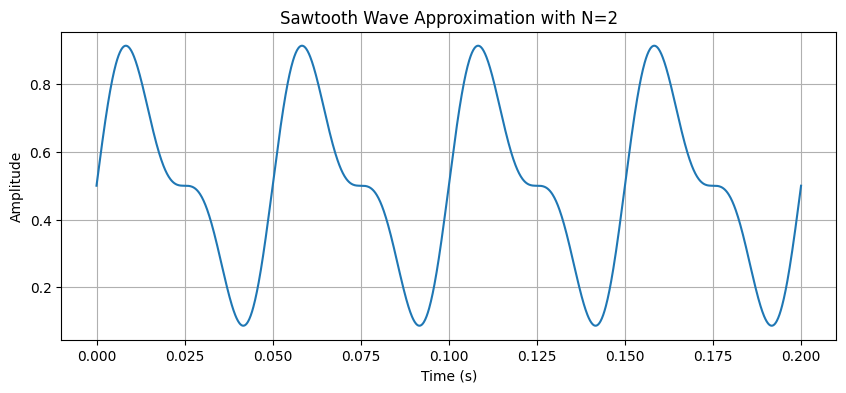

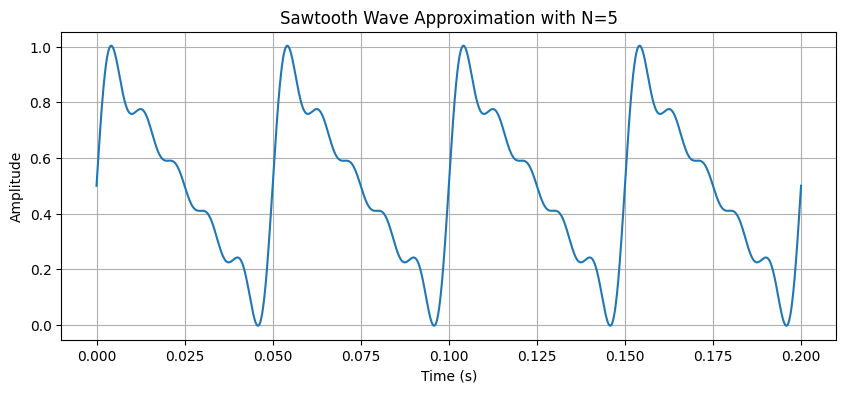

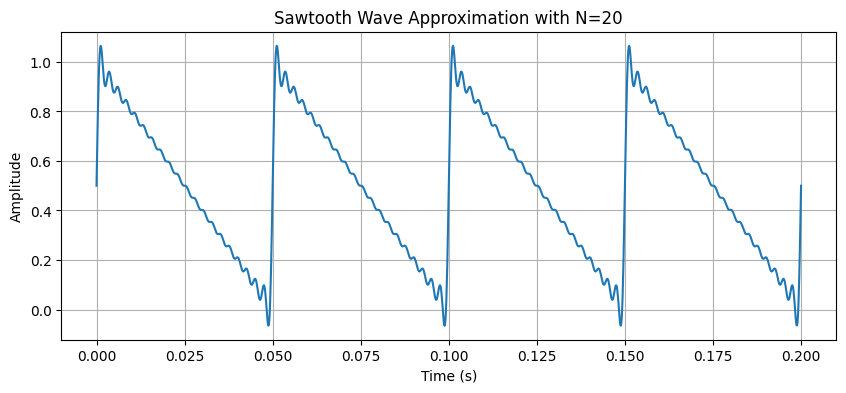

C:\Users\banbo\AppData\Local\Temp\ipykernel_13996\1080077659.py:59: RuntimeWarning: invalid value encountered in divide
  a = (2 * np.sin(a * np.pi/2))/(1j * (a * np.pi) ** 2) * np.e ** (-2j * a * np.pi/2) # Calculate the coefficients


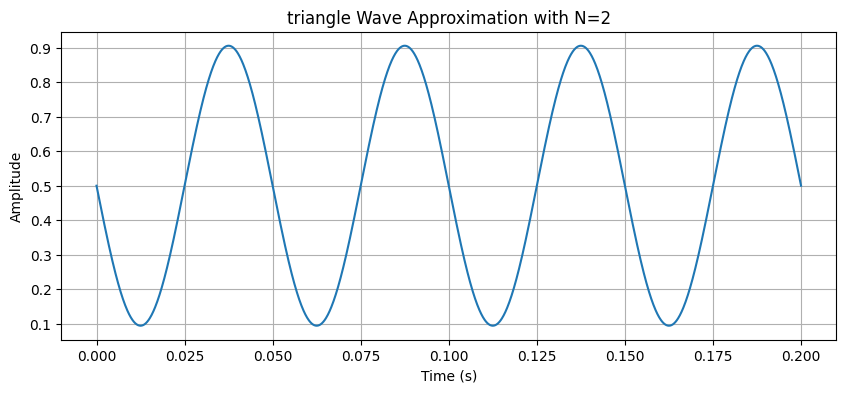

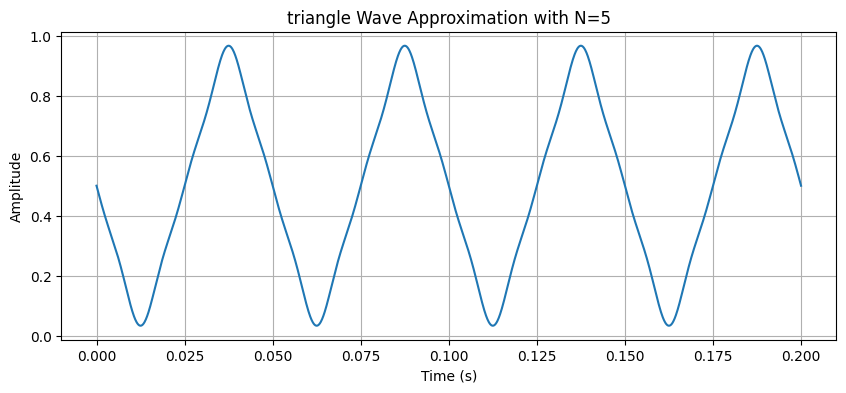

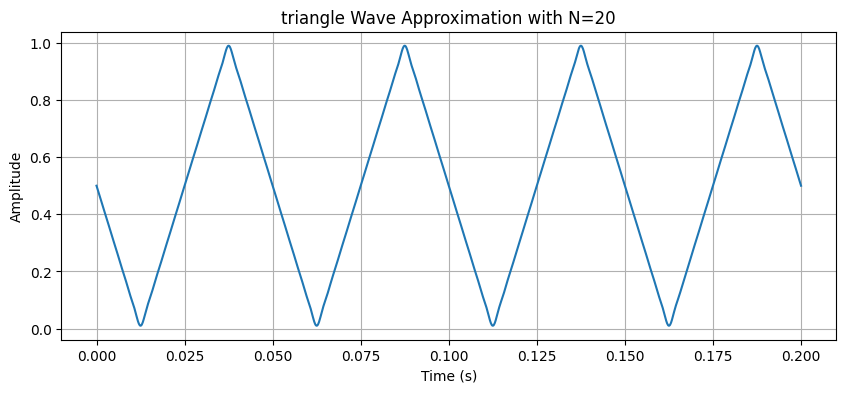

In [102]:
# Assignment 1 - Generating Periodic Signals with Fourier Series

# Part A - Writing a periodic signal generator function
# Input: t = time in seconds, fs = sampling rate, a = coefficients above, w = fundamental frequency (in Hz)
# Output: x = periodic signal
def fourier_series(t, fs, a, w):
    samples = int(t * fs) # Number of samples
    length = len(a) # Length of the coefficients
    
    x = np.zeros(samples) # Initializes the signale
    s = np.linspace(0, t, samples) # Time vector

    amps = np.abs(a) # Amplitudes
    phases = np.angle(a) # Phases

    x += amps[0] # Adds the DC component

    for i in range(1, length):
        x += 2 * amps[i] * np.cos(i * w * 2 * np.pi * s + phases[i]) # Adds the harmonics

    return x

# Part B - Initialize the parameters
samp_freq = 8000
fund_freq = 20
duration = 0.2
time = np.linspace(0, duration, int(samp_freq * duration)) # Time vector

# Part C - Sawtooth Curve
# Create a vector of a values as shown above for N = 2, 5, 20 
# Use the function above to find the approximations 
# Plot the 3 approximations
approximations = [2, 5, 20]

for length in approximations:
    a = np.linspace(0, length, length + 1) # Initialize the coefficients
        
    a = 1/(2 * 1j * a * np.pi) # Calculate the coefficients
    a[0] = 0.5

    x = fourier_series(duration, samp_freq, a, fund_freq) # Generate the signal

    plt.figure(figsize = (10, 4))
    plt.plot(time, x)
    plt.title(f'Sawtooth Wave Approximation with N={length}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()


# Part D - Triangle Curve
# Create a vector of a values as shown above for N = 2, 5, 20 
# Use the function above to find the approximations 
# Plot the 3 approximations
for length in approximations:
    a = np.linspace(0, length, length + 1) # Initialize the coefficients
        
    a = (2 * np.sin(a * np.pi/2))/(1j * (a * np.pi) ** 2) * np.e ** (-2j * a * np.pi/2) # Calculate the coefficients
    a[0] = 0.5

    x = fourier_series(duration, samp_freq, a, fund_freq) # Generate the signal

    plt.figure(figsize=(10, 4))
    plt.plot(time, x)
    plt.title(f'triangle Wave Approximation with N={length}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()




###  Discussion

You should have noticed that the second signal converges more quickly. Discuss the two reasons for this.

## Assignment 2 -- Synthesizing a musical note

In this assignment, you will use the same synthesis equations to try to approximate a single note from a horn, which has the frequency characteristics illustrated below. Download the file horn11short.wav from the google drive to compare your synthesized version to the original.

Figure below shows the frequency component of a note played by a horn.
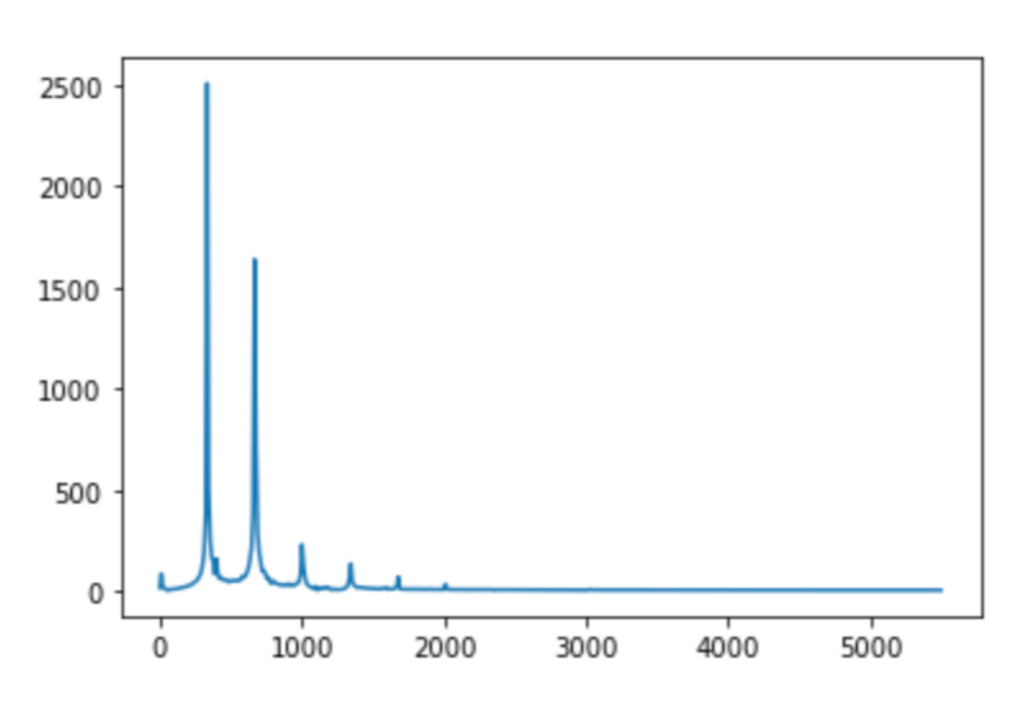

**A.**  Read in the horn signal, and use the sampling rate $f_s$ that you read in to create a time vector of length 100ms. Define the fundamental frequency to be $f_0$ = 335Hz. Create a signal that is a sinusoid at that frequency, and save it as a wav file.

**B.**  Create a vector (or two) to characterize $a_k$ using:

$$|a_k|:[2688,1900,316,178,78,38]$$

$$\angle a_k:[-1.73,-1.45,2.36,2.30,-2.30,1.13]$$

assuming $a_0=0$ and the first element of the vectors correspond to $a_1$. Use the function you created in part 1 to synthesize a signal, with $f_s$ and $f_0$ above, and save it as a wav file. Because the phase and magnitude are now hard coded, you may need to modify your function from above to apply here, so it is recommended that you copy and rename the function into another cell to make your debugging easier. 

**C.**  Plot the 100ms section of the original file starting at 200ms with a plot of the synthesized signal in a 2×1 plot.

**D.** Play the original file, the single tone, and the 6-tone approximation in series.



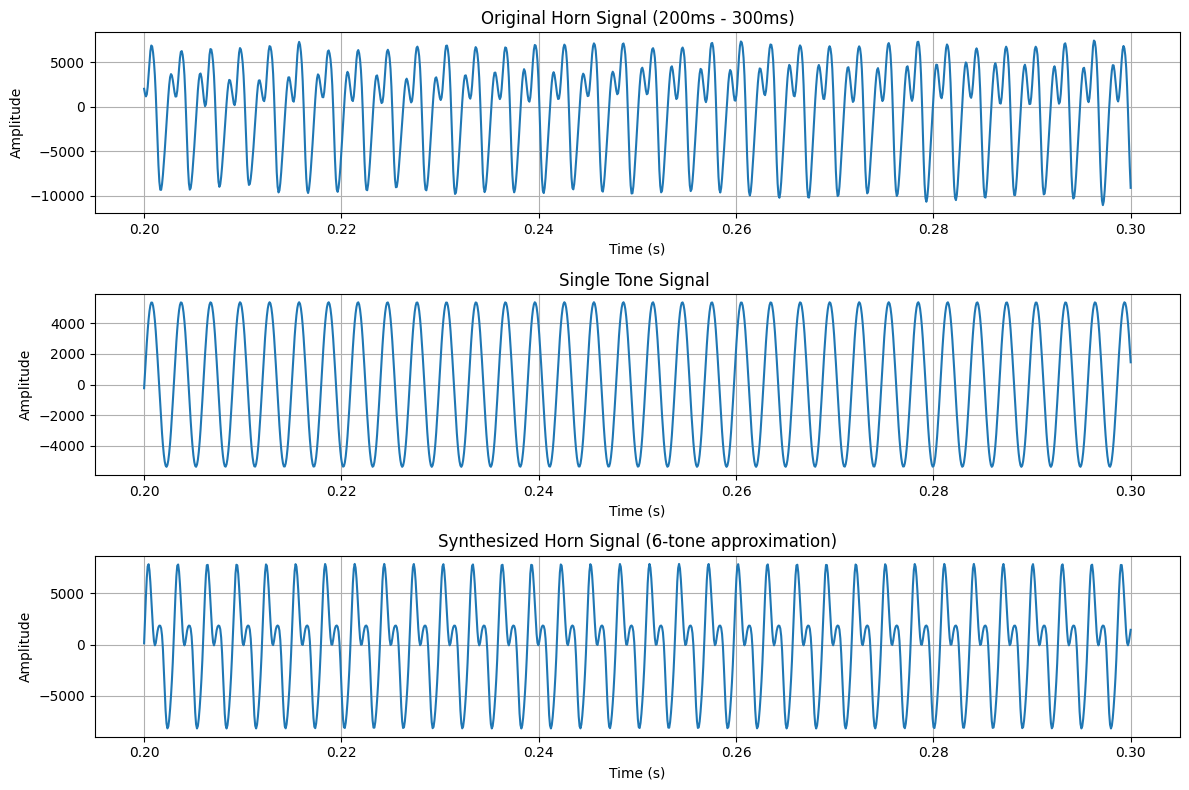

In [122]:
#################################################################################################
# Part A - Reading Base Signal and Creating Single Tone
#################################################################################################

# Define the fundamental frequency (HZ)
f0 = 335

# Read the horn signal
fs, horn_signal = wavfile.read('horn11short.wav')

# Use function from first part to create s1 siganl
s1 = fourier_series(
  t  = 0.5, 
  fs = fs,
  a  = np.array([0, 2688*np.exp(1j * -1.73)]),
  w = f0
)

# Save the single tone as a WAV file
wavfile.write('single_tone.wav', fs, s1.astype(np.float32))

#################################################################################################
# Part B - Create Synthesized Signal Using Fourier Series
#################################################################################################

# Define list of coeff amplitude and phase values
s2_magnitudes = np.array([0, 2688, 1900, 316, 178, 78, 38]) 
s2_phases = np.array([0, -1.73, -1.45, 2.36, 2.30, -2.30, 1.13])

# Convert magnitudes and phases to complex coefficients
s2_coeff = s2_magnitudes * np.exp(1j * s2_phases)

# Generate the synthesized signal using function from Assignment 1
s2 = fourier_series(
  t  = 0.5,
  fs = fs,
  a  = s2_coeff, 
  w  = f0
)

# Save the synthesized signal as a WAV file
wavfile.write('synthesized_horn.wav', fs, s2.astype(np.float32))

#################################################################################################
# Part C - Plot The Signals
#################################################################################################

# Calculate sample indices for 100ms starting at 200ms
start_sample = int(0.2 * fs)
end_sample = start_sample + int(0.1 * fs)

# Create time vectors for both plots
original_time = np.linspace(0.2, 0.3, int(fs * 0.1))
one_tone_time = np.linspace(0.2, 0.3, int(fs * 0.1))
synthesized_time = np.linspace(0.2, 0.3, int(fs * 0.1))

# Create a 2×1 subplot
plt.figure(figsize=(12, 8))

# Plot the original signal
plt.subplot(3, 1, 1)
plt.plot(original_time, horn_signal[start_sample:end_sample])
plt.title('Original Horn Signal (200ms - 300ms)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Single tone signal plot
plt.subplot(3, 1, 2)
plt.plot(one_tone_time, s1[start_sample:end_sample])
plt.title("Single Tone Signal ")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot the synthesized signal
plt.subplot(3, 1, 3)
plt.plot(synthesized_time, s2[start_sample:end_sample])
plt.title('Synthesized Horn Signal (6-tone approximation)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

#################################################################################################
# Part D - Play The Audio
#################################################################################################

# Play the audio files (original, single tone, and 6-tone approximation)
display(Audio(horn_signal, rate=fs))
display(Audio(s1, rate=fs))
display(Audio(s2, rate=fs))

###  Discussion

The approximation does not sound quite like the original signal and the plot should
look pretty different. The difference in sound is in part due to multiple factors, including the truncated approximation, imperfect estimate of the parameters, and the fact that the original signal is not perfectly periodic. Try adjusting some parameters and determine what you think is the main source of distortion.